***Dataset after Imputation: imputed_data.csv***




In [4]:
import pandas as pd

file_path = './data/imputed_data.csv'
data = pd.read_csv(file_path)
data.head()


,Name,Position,College,Round,Pick,Stat URL,Height,Weight,40 Yard Dash,Bench Press,...,rec_td,rush_att,rush_yds,rush_yds_per_att,rush_td,scrim_att,scrim_yds,scrim_yds_per_att,scrim_td,Year
0,Emmanuel Acho,OLB,Texas,6,204,https://www.sports-reference.com/cfb/players/e...,74.0,238.0,4.64,24.00,...,5.29,199.20,1282.58,8.83,14.91,239.71,1747.91,8.22,20.20,2012
1,Joe Adams,WR,Arkansas,4,104,https://www.sports-reference.com/cfb/players/j...,71.0,179.0,4.51,14.59,...,8.50,4.00,69.50,11.65,0.00,96.00,1393.50,14.45,8.50,2012
2,Chas Alecxih,DT,Pittsburgh,0,0,https://www.sports-reference.com/cfb/players/c...,76.0,296.0,5.31,19.00,...,0.00,1.19,5.20,-0.68,0.36,1.36,5.55,0.86,0.36,2012
3,Frank Alexander,DE,Oklahoma,4,103,https://www.sports-reference.com/cfb/players/f...,76.0,270.0,4.80,24.48,...,2.17,22.98,75.37,4.12,4.24,36.81,231.59,6.49,6.41,2012
4,Antonio Allen,S,South Carolina,7,242,https://www.sports-reference.com/cfb/players/a...,73.0,210.0,4.58,17.00,...,1.68,374.69,2061.25,4.94,19.21,420.39,2397.36,6.43,20.89,2012


**Number of College Players per Position:**

In [8]:
players_per_position = data.loc[:, ['Position']].value_counts().reset_index()
players_per_position

,Position,count
0,WR,538
1,CB,379
2,RB,342
3,S,237
4,DT,216
5,TE,210
6,DE,193
7,OT,193
8,QB,184
9,LB,176


***Visualization 4: Impact of Combine Performance on Draft Outcomes***

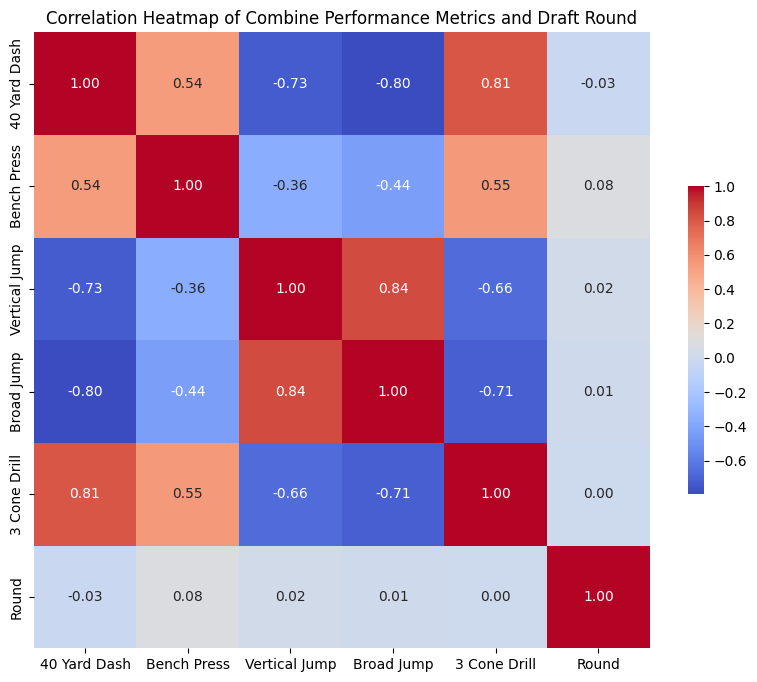

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame and it includes combine metrics like '40 Yard Dash', 'Bench Press', etc., and 'Round'
# Selecting the combine metrics columns (replace 'metric1', 'metric2', etc., with actual column names)
combine_metrics = ['40 Yard Dash', 'Bench Press', 'Vertical Jump', 'Broad Jump', '3 Cone Drill']  # example metric columns
# Adding 'Round' to the list of columns to include it in the correlation matrix
combine_metrics.append('Round')

# Calculating the correlation matrix
corr = data[combine_metrics].corr()

# Setting up the matplotlib figure
plt.figure(figsize=(10, 8))

# Drawing the heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'shrink': .5}, square=True)
plt.title('Correlation Heatmap of Combine Performance Metrics and Draft Round')
plt.show()

***Visualization 5: Positional Value in Draft Rounds***

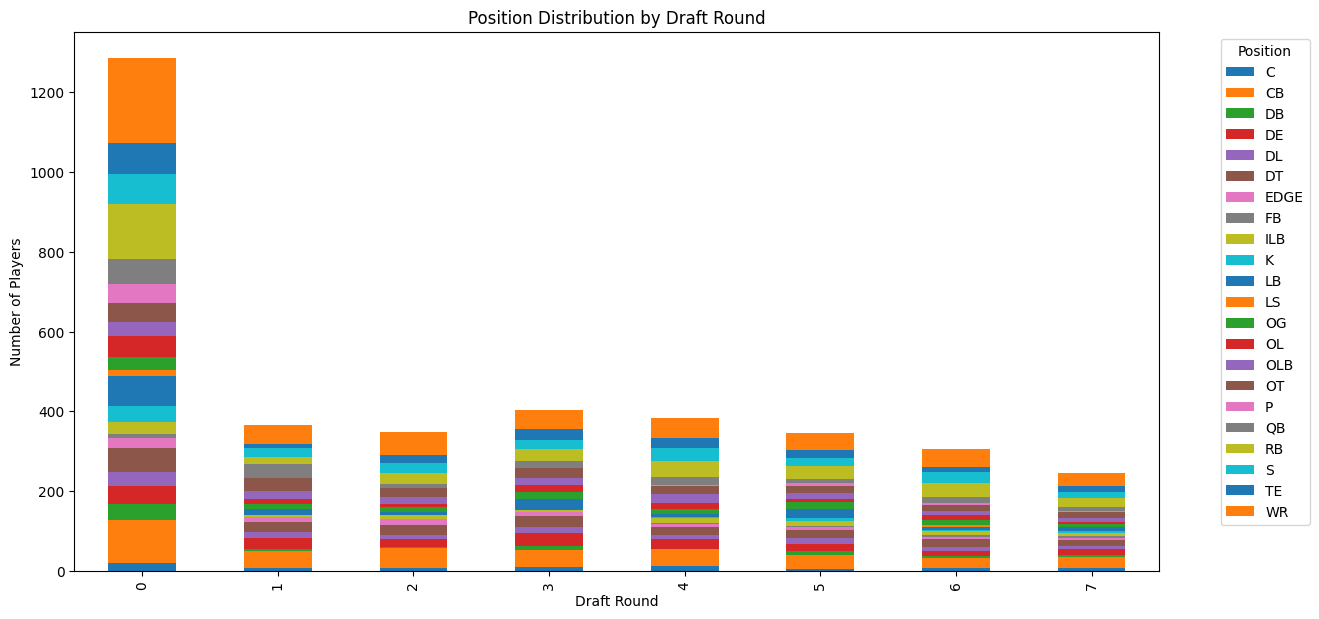

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is your DataFrame and it includes 'Position' and 'Round' columns
# First, we need to get the count of each position in each round
position_round_counts = data.groupby(['Round', 'Position']).size().unstack().fillna(0)

# Plotting the stacked bar chart
position_round_counts.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Position Distribution by Draft Round')
plt.xlabel('Draft Round')
plt.ylabel('Number of Players')
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

***Visualization 6: Proportion of Players Drafted by Round for Selected Positions (OT vs. Kickers/Punters)***

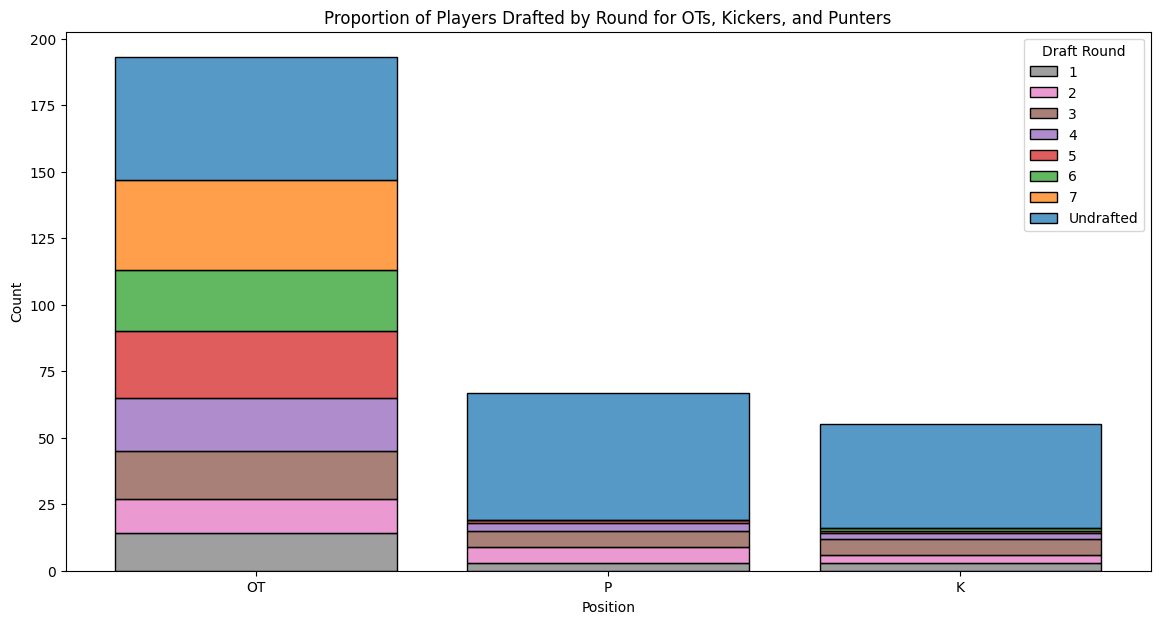

In [7]:
data['Drafted'] = data['Round'].apply(lambda x: 'Undrafted' if x == 0 else 'Drafted')


positions_to_compare = ['OT', 'K', 'P']
draft_rounds_data = data[data['Position'].isin(positions_to_compare) & (data['Round'] <= 7)]

plt.figure(figsize=(14, 7))
sns.histplot(data=draft_rounds_data, x='Position', hue='Round', multiple='stack', palette='tab10', shrink=0.8)
plt.title('Proportion of Players Drafted by Round for OTs, Kickers, and Punters')
plt.xlabel('Position')
plt.ylabel('Count')
plt.legend(title='Draft Round', loc='upper right', labels=['1', '2', '3', '4', '5', '6', '7', 'Undrafted'])
plt.show()